In [2]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex. tools import input_factory, plot_tools



nr of spikes: 26
spikes times: [ 0.509129  0.51983   0.531199  0.543285  0.556138  0.569804  0.584323
  0.599728  0.616037  0.633253  0.65136   0.670324  0.69009   0.710589
  0.731742  0.753463  0.775667  0.798274  0.82121   0.844412  0.867826
  0.891407  0.915119  0.938933  0.962825  0.986778] s


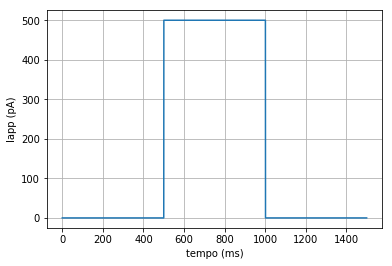

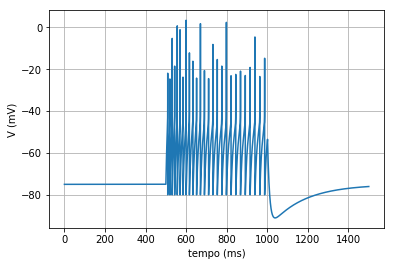

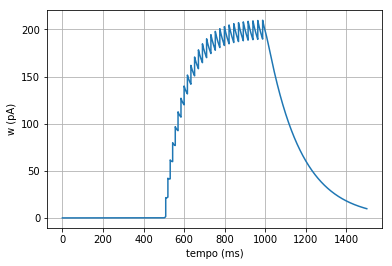

In [45]:
"""
Implements the dynamics of the exponential Integrate-and-fire model

Args:
    tau (Quantity): Membrane time constant
    R (Quantity): Membrane resistance
    v_rest (Quantity): Resting potential
    v_reset (Quantity): Reset value (vm after spike)
    v_rheobase (Quantity): Rheobase threshold
    v_spike (Quantity) : voltage threshold for the spike condition
    delta_T (Quantity): Sharpness of the exponential term
    I_stim (TimedArray): Input current
    simulation_time (Quantity): Duration for which the model is simulated
"""
v_rest= -75*b2.mV #EL
v_reset= -80*b2.mV #Vreset
conductance_L = 10*b2.nsiemens #GL
membrane_capacitance = 100*b2.pF #CM
firing_threshold = -50 * b2.mV #Vth
deltaVth = 2*b2.mV

a = 2*b2.nsiemens
b = 0.02*b2.nA

tau_w = 200*b2.ms
v_max = 20*b2.mV

simulation_time = 1500
dt =  0.001 * b2.ms 

#current = 200.01 * b2.pamp
current = 500
input_current = input_factory.get_step_current(
t_start=500, t_end=1000, unit_time=b2.ms,
amplitude=current*b2.pA) 

# differential equation of Leaky Integrate-and-Fire model
eqs = """

dv/dt = (conductance_L/membrane_capacitance)*(v_rest - v + deltaVth*exp((v-firing_threshold)/deltaVth))
        - (w/membrane_capacitance)
        + (input_current(t,i)/membrane_capacitance) : volt
dw/dt = (a*(v-v_rest)-w)/tau_w :  amp
"""
neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset; w=w+b", threshold="v>v_max", method="euler", dt=dt)
neuron.v = v_rest
neuron.w = 0*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "w"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

print("nr of spikes: {}".format(spike_monitor.count[0]))
print("spikes times: {}".format(spike_monitor.t[:]))

plt.figure(1)
c = input_current(state_monitor.t, 0)
plt.plot(state_monitor.t/b2.ms, c/b2.pA )
plt.xlabel('tempo (ms)')
plt.ylabel('Iapp (pA)')
plt.grid()
plt.figure(2)
#axis_v = plt.subplot(312)

plt.plot(state_monitor.t/b2.ms, state_monitor.v[0]/b2.mV)
plt.xlabel('tempo (ms)')
plt.ylabel('V (mV)')
plt.grid()
#plt.legend(["vm", "firing threshold"], fontsize=12)
plt.figure(3)

plt.plot(state_monitor.t/b2.ms, state_monitor.w[0]/b2.pA)
plt.grid()
plt.xlabel('tempo (ms)')
plt.ylabel('w (pA)')

plt.show()


WARNING    "input_current" is an internal variable of group "neurongroup", but also exists in the run namespace with the value array([300, 310, 320, ..., 570, 580, 590]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


nr of spikes: <spikemonitor.count: array([ 36,  48,  59,  70,  80,  90,  99, 108, 117, 125, 134, 142, 150,
       158, 166, 174, 181, 189, 197, 204, 211, 219, 226, 233, 241, 248,
       255, 262, 269, 276])>
spikes times: [    7.4      7.55     7.75 ...,  4999.    4999.6   4999.7 ] ms
spikes train: 23.5 ms
[23.391812865497077, 27.97202797202797, 32.051282051282044, 35.842293906810035, 39.44773175542406, 42.82655246252676, 46.189376443418006, 49.38271604938271, 52.49343832020996, 55.55555555555555, 58.47953216374269, 61.53846153846155, 64.30868167202571, 67.34006734006734, 70.17543859649122, 72.99270072992698, 75.75757575757576, 78.4313725490196, 81.30081300813009, 84.03361344537812, 86.58008658008654, 89.28571428571428, 92.1658986175115, 94.7867298578199, 97.56097560975607, 99.99999999999999, 102.56410256410258, 105.26315789473686, 108.1081081081081, 110.49723756906079]
[6.718172657037269, 9.017132551848512, 11.217049915872229, 13.315579227696258, 15.31393568147021, 17.226528854435916,

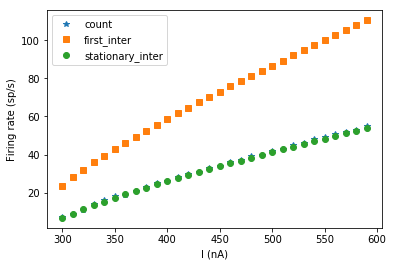

In [14]:
v_rest= -75*b2.mV #EL
v_reset= -80*b2.mV #Vreset
conductance_L = 10*b2.nsiemens #GL
membrane_capacitance = 100*b2.pF #CM
firing_threshold = -50 * b2.mV #Vth
deltaVth = 2*b2.mV

a = 2*b2.nsiemens
b = 0.02*b2.nA

tau_w = 200*b2.ms
v_max = 20*b2.mV

#current = 200.01 * b2.pamp
input_current = np.arange(300, 600, 10)
# differential equation of Leaky Integrate-and-Fire model
eqs = """

dv/dt = (conductance_L/membrane_capacitance)*(v_rest - v + deltaVth*exp((v-firing_threshold)/deltaVth))
        - (w/membrane_capacitance)
        + (input_current/membrane_capacitance) : volt
dw/dt = (a/tau_w) * (v - v_rest) - (w/tau_w) : ampere
input_current : amp
"""
neuron = b2.NeuronGroup(len(current), model=eqs, reset="v=v_reset; w=w+b", threshold="v>v_max", method="euler")
neuron.v = v_rest
neuron.w = 0*b2.pA
neuron.input_current = input_current*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v","w"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.second)

#plot
# input_current = [None]*len(current)
# for i in range(len(current)):
#     input_current[i] = input_factory.get_step_current(t_start=0, t_end=simulation_time, unit_time=b2.second,
#     amplitude= current[i]*b2.nA) 
#     plot_tools.plot_voltage_and_current_traces(
#     state_monitor, input_current[i], title="min input", firing_threshold=firing_threshold)

plt.figure(2)
print("nr of spikes: {}".format(spike_monitor.count))
print("spikes times: {}".format(spike_monitor.t[:]))

print("spikes train: {}".format(spike_monitor.spike_trains()[0][0]))

first_inter = [None]*len(input_current)
stationary_inter = [None]*len(input_current)
for i in range(len(input_current)):
    first_inter[i] = 1/(float(spike_monitor.spike_trains()[i][2]) - float(spike_monitor.spike_trains()[i][1]))
    stationary_inter[i] = 1/(float(spike_monitor.spike_trains()[i][-2]) - float(spike_monitor.spike_trains()[i][-3]))
    
print(first_inter)
print(stationary_inter)
plt.plot(neuron.input_current/b2.pA, spike_monitor.count/simulation_time, '*', label='count')
plt.plot(neuron.input_current/b2.pA, first_inter/b2.second, 's', label='first_inter')
plt.plot(neuron.input_current/b2.pA, stationary_inter/b2.second, 'o', label='stationary_inter')
plt.xlabel('I (nA)')
plt.ylabel('Firing rate (sp/s)')
plt.legend()
plt.show()